In [139]:
import pandas as pd
preview_link = "https://drive.google.com/file/d/1cMr9WLjABLwANu8i81ixgdKqe7AmgcxJ/view?usp=drive_link"
file_id = preview_link.split("/")[5]
download_link = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(download_link,encoding='utf-8')
target=df['cardio']
print(df)


          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [140]:
#AGE find it with years

df['age_years']=round((df['age']/365.25), 0)
print (df['age_years'])

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age_years, Length: 70000, dtype: float64


In [141]:
#GENDER
df['gender'] = df['gender'].replace(2, 0)
print(df['gender'] )
#1 women
#0 men

0        0
1        1
2        1
3        0
4        1
        ..
69995    0
69996    1
69997    0
69998    1
69999    1
Name: gender, Length: 70000, dtype: int64


In [142]:
#AGE CATEGORIES
df["age_child"] = (df['age_years'] < 18).astype(int)
df['age_young'] = ((df['age_years'] >= 18) & (df['age_years'] <= 35)).astype(int)
df['age_middle'] = ((df['age_years'] >= 36) & (df['age_years'] <= 55)).astype(int)
df['age_elderly'] = (df['age_years'] > 56).astype(int)
print(df["age_child"].sum())
print(df['age_young'].sum())
print(df['age_middle'].sum())
print( df['age_elderly'].sum())

0
4
39762
24290


In [143]:
#BMI COLUMN CREATION
# Convert height from cm to meters
df['height_m'] = df['height'] / 100

# Calculate BMI
df['bmi'] = df['weight'] / (df['height_m'] ** 2)
df['bmi'] = round((df['bmi']),1)

#BMI CATEGORIES
df["bmi_under"] = (df['bmi'] < 18.5).astype(int)
df['bmi_normal'] = ((df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)).astype(int)
df['bmi_over'] = ((df['bmi'] >= 25) & (df['bmi'] <= 29.9)).astype(int)
df['bmi_obese'] = (df['bmi'] > 30).astype(int)
print(df["bmi_under"].sum())
print( df["bmi_normal"].sum())
print(df["bmi_over"].sum())
print(df["bmi_obese"].sum())


629
25216
25546
18290


In [144]:
#FOR AP_HI AND AP_LOW categories
df["normaltension"] = ((df['ap_hi'] < 120) & (df['ap_lo'] < 80)).astype(int)
df['prehypertension'] = ((df['ap_hi'] >= 120) & (df['ap_hi'] <= 129)).astype(int)
df['hypertension_stage1'] = ((df['ap_hi'] >= 130) & (df['ap_hi'] <= 139) | (df['ap_lo'] >= 80) & (df['ap_lo'] <= 89)).astype(int)
df['hypertension_stage2'] = ((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)

print(df["normaltension"].sum())
print(df['prehypertension'].sum())
print(df['hypertension_stage1'].sum() )
print(df['hypertension_stage2'].sum() )

9608
28288
39934
24705


In [145]:
# df.to_csv("cardiao_clean.csv", index=False)

In [146]:
# from google.colab import files

# files.download("cardiao_clean.csv")

#### Analysis on cleaned data

In [147]:
df = pd.read_csv('https://raw.githubusercontent.com/Rafig77/data/main/cardiao_clean.csv')
print(df['height'])


0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 70000, dtype: int64


#### Visualization

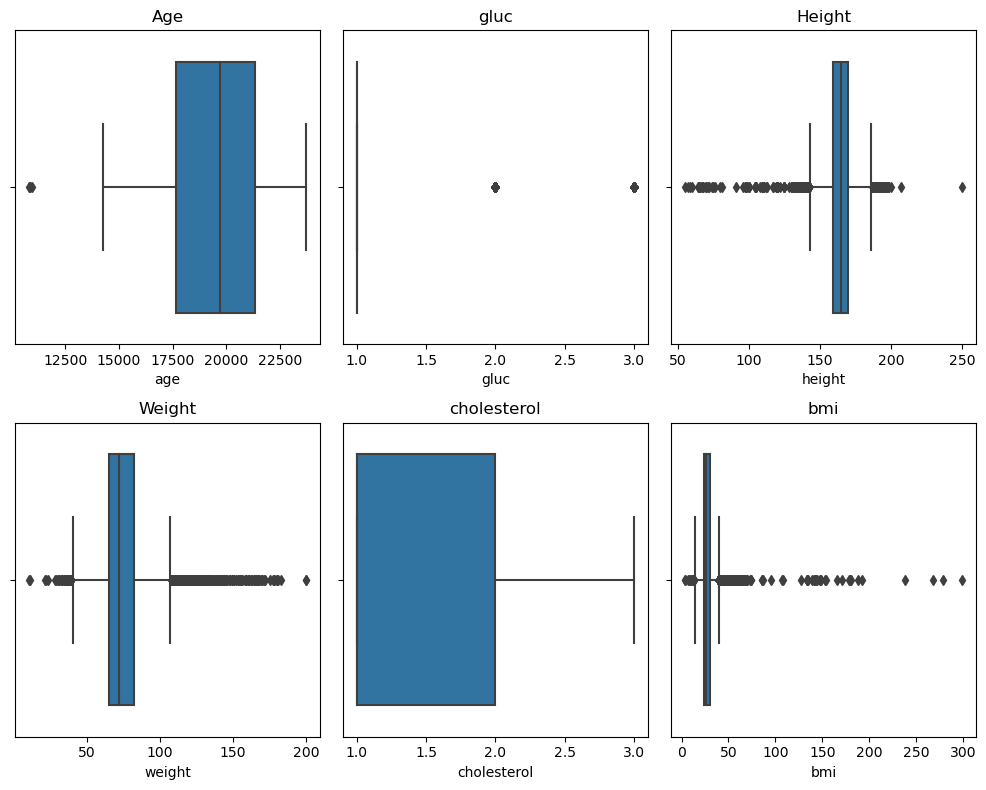

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Rafig77/data/main/cardiao_clean.csv')

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Box plot for 'age'
sns.boxplot(x='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age')

# Box plot for 'gluc' (gender)
sns.boxplot(x='gluc',  data=df, ax=axes[0, 1])
axes[0, 1].set_title('gluc')

# Box plot for 'height'
sns.boxplot(x='height', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Height')

# Box plot for 'weight'
sns.boxplot(x='weight', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Weight')

# Box plot for 'cholesterol'
sns.boxplot(x='cholesterol', data=df, ax=axes[1, 1])
axes[1, 1].set_title('cholesterol')

# Box plot for 'bmi'
sns.boxplot(x='bmi',  data=df, ax=axes[1, 2])
axes[1, 2].set_title('bmi')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/Rafig77/data/main/cardiao_clean.csv')

#Cut is used to categorize data
height_ranges=pd.cut(df['height'],bins=range(df['height'].min(),df['height'].max()+1,20))
height_counts = height_ranges.value_counts().sort_index()

print("Height Counts by 20-Unit Ranges:")
print(height_counts)

Height Counts by 20-Unit Ranges:
(55, 75]         20
(75, 95]          4
(95, 115]        24
(115, 135]       72
(135, 155]     8526
(155, 175]    55789
(175, 195]     5537
(195, 215]       26
(215, 235]        0
Name: height, dtype: int64


#### Feature engineering

In [150]:
# Categorizing Height
df['height_low'] = df['height'].apply(lambda x: int(x<136))
df['height_normal']=df['height'].apply(lambda x:int(x>137 and x<160))
df['height_high']=df['height'].apply(lambda x:int(x>161))





#### Finding relationship visuzaling

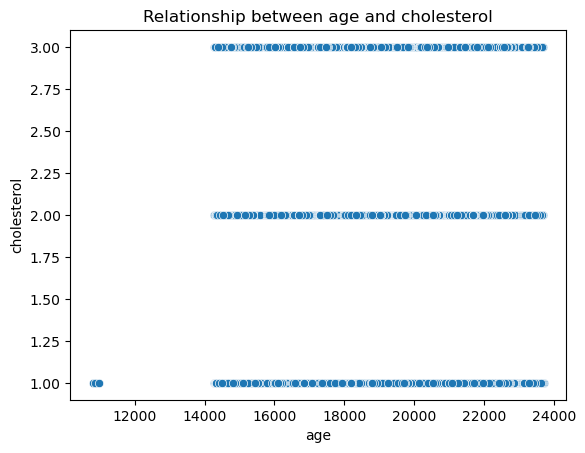

0.15442374182535915

In [151]:
# Relationship between age and cholesterol
sns.scatterplot(x='age',y='cholesterol',data=df)
plt.xlabel('age')
plt.ylabel('cholesterol')
plt.title('Relationship between age and cholesterol')
plt.show()
df['age'].corr(df['cholesterol'])

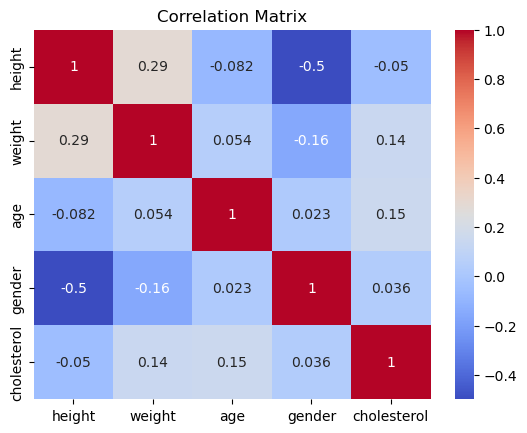

In [152]:
correlation_matrix = df[['height', 'weight', 'age', 'gender','cholesterol']].corr()

# Heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [153]:
import scipy.stats as stats

# Assuming you want to test the hypothesis related to 'height' and 'gender' variables

# Formulate the hypothesis
# Null Hypothesis (H0): There is no significant difference in mean height between genders.
# Alternative Hypothesis (Ha): There is a significant difference in mean height between genders.

# Perform t-test to compare the mean heights between genders
male_heights = df[df['gender'] == 0]['height']
female_heights = df[df['gender'] == 1]['height']

# Getting t-value for determing if there is a big difference of relationship between groups
t_statistic, p_value = stats.ttest_ind(male_heights, female_heights)

# Print the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

T-Statistic: 152.35700318076493
P-Value: 0.0
Reject Null Hypothesis


In [154]:
 df.to_csv("cardiao_clean2.csv", index=False)